In [1]:
import os
import gdown
from src import config
import seaborn as sns
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
from sklearn import datasets
import pandas as pd
import numpy as np


## Data Download

In [2]:
if not os.path.exists(config.DATASET_TRAIN):
    gdown.download(config.DATASET_TRAIN_URL, config.DATASET_TRAIN, quiet=False)

In [3]:
trips = pq.read_table(config.DATASET_TRAIN)
trips = trips.to_pandas()

In [4]:
# Visualization of the data of the first 5 rows
trips.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.1,1.0,N,246,151,2,17.0,3.0,0.5,0.00,0.0,0.3,20.80,2.5,0.0
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.3,1.0,N,238,74,2,11.0,3.0,0.5,0.00,0.0,0.3,14.80,2.5,0.0
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.2,1.0,N,163,260,2,15.5,3.0,0.5,0.00,0.0,0.3,19.30,2.5,0.0
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.0,1.0,N,79,182,1,41.2,0.0,0.5,0.00,0.0,0.3,42.00,0.0,0.0
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.6,1.0,N,238,75,1,7.5,3.0,0.5,2.25,0.0,0.3,13.55,2.5,0.0


In [7]:
# Convert the 'start_time' column to datetime
trips['tpep_pickup_datetime'] = pd.to_datetime(trips['tpep_pickup_datetime'])

# Extract the hour from each start time
trips['start_hour'] = trips['tpep_pickup_datetime'].dt.hour

trips.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,start_hour
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.1,1.0,N,246,151,2,17.0,3.0,0.5,0.00,0.0,0.3,20.80,2.5,0.0,0
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.3,1.0,N,238,74,2,11.0,3.0,0.5,0.00,0.0,0.3,14.80,2.5,0.0,0
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.2,1.0,N,163,260,2,15.5,3.0,0.5,0.00,0.0,0.3,19.30,2.5,0.0,0
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.0,1.0,N,79,182,1,41.2,0.0,0.5,0.00,0.0,0.3,42.00,0.0,0.0,0
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.6,1.0,N,238,75,1,7.5,3.0,0.5,2.25,0.0,0.3,13.55,2.5,0.0,0


In [9]:
trips['trips_per_hour'] = trips['start_hour'].map(trips['start_hour'].value_counts())
trips.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,start_hour,trips_per_hour
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.1,1.0,N,246,151,2,...,3.0,0.5,0.00,0.0,0.3,20.80,2.5,0.0,0,101898
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.3,1.0,N,238,74,2,...,3.0,0.5,0.00,0.0,0.3,14.80,2.5,0.0,0,101898
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.2,1.0,N,163,260,2,...,3.0,0.5,0.00,0.0,0.3,19.30,2.5,0.0,0,101898
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.0,1.0,N,79,182,1,...,0.0,0.5,0.00,0.0,0.3,42.00,0.0,0.0,0,101898
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.6,1.0,N,238,75,1,...,3.0,0.5,2.25,0.0,0.3,13.55,2.5,0.0,0,101898


In [10]:
# Convert the time columns to datetime
trips['time1'] = pd.to_datetime(trips['tpep_pickup_datetime'])
trips['time2'] = pd.to_datetime(trips['tpep_dropoff_datetime'])

# Calculate the difference in hours
trips['time_diff'] = (trips['time2'] - trips['time1']).dt.total_seconds() / 3600

trips.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,start_hour,trips_per_hour,time1,time2,time_diff
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.1,1.0,N,246,151,2,...,0.0,0.3,20.80,2.5,0.0,0,101898,2022-05-01 00:00:36,2022-05-01 00:19:18,0.311667
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.3,1.0,N,238,74,2,...,0.0,0.3,14.80,2.5,0.0,0,101898,2022-05-01 00:27:44,2022-05-01 00:41:33,0.230278
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.2,1.0,N,163,260,2,...,0.0,0.3,19.30,2.5,0.0,0,101898,2022-05-01 00:59:00,2022-05-01 01:14:22,0.256111
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.0,1.0,N,79,182,1,...,0.0,0.3,42.00,0.0,0.0,0,101898,2022-05-01 00:48:18,2022-05-01 01:28:02,0.662222
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.6,1.0,N,238,75,1,...,0.0,0.3,13.55,2.5,0.0,0,101898,2022-05-01 00:28:26,2022-05-01 00:37:49,0.156389


In [11]:
# Calculate speed in miles per hour
trips['speed'] = trips['trip_distance'] / trips['time_diff']

trips.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,start_hour,trips_per_hour,time1,time2,time_diff,speed
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.1,1.0,N,246,151,2,...,0.3,20.80,2.5,0.0,0,101898,2022-05-01 00:00:36,2022-05-01 00:19:18,0.311667,13.155080
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.3,1.0,N,238,74,2,...,0.3,14.80,2.5,0.0,0,101898,2022-05-01 00:27:44,2022-05-01 00:41:33,0.230278,9.987937
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.2,1.0,N,163,260,2,...,0.3,19.30,2.5,0.0,0,101898,2022-05-01 00:59:00,2022-05-01 01:14:22,0.256111,16.399132
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.0,1.0,N,79,182,1,...,0.3,42.00,0.0,0.0,0,101898,2022-05-01 00:48:18,2022-05-01 01:28:02,0.662222,0.000000
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.6,1.0,N,238,75,1,...,0.3,13.55,2.5,0.0,0,101898,2022-05-01 00:28:26,2022-05-01 00:37:49,0.156389,10.230906


In [14]:
average_speed_per_hour = trips.groupby('start_hour')['speed'].mean()
trips['average_speed_per_hour']  = trips.groupby('start_hour')['speed'].mean()
trips.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,airport_fee,start_hour,trips_per_hour,time1,time2,time_diff,speed,average_speed_per_hour
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.1,1.0,N,246,151,2,...,20.80,2.5,0.0,0,101898,2022-05-01 00:00:36,2022-05-01 00:19:18,0.311667,13.155080,NaN
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.3,1.0,N,238,74,2,...,14.80,2.5,0.0,0,101898,2022-05-01 00:27:44,2022-05-01 00:41:33,0.230278,9.987937,NaN
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.2,1.0,N,163,260,2,...,19.30,2.5,0.0,0,101898,2022-05-01 00:59:00,2022-05-01 01:14:22,0.256111,16.399132,NaN
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.0,1.0,N,79,182,1,...,42.00,0.0,0.0,0,101898,2022-05-01 00:48:18,2022-05-01 01:28:02,0.662222,0.000000,NaN
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.6,1.0,N,238,75,1,...,13.55,2.5,0.0,0,101898,2022-05-01 00:28:26,2022-05-01 00:37:49,0.156389,10.230906,NaN


In [15]:
trips['speed'].isna().any()

True

In [16]:
trips['time_diff'].eq(0).any()

True

In [19]:
# Remove rows whetrips['time_diff'].eq(0).any().re 'speed' is NaN or 'time_diff' is zero
trips = trips.dropna(subset=['speed'])
trips = trips[trips['time_diff'] != 0]

# Now calculate the average speed per hour
average_speed_per_hour = trips.groupby('start_hour')['speed'].mean()
trips['average_speed_per_hour'] = trips['start_hour'].map(average_speed_per_hour)

In [20]:
trips.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,airport_fee,start_hour,trips_per_hour,time1,time2,time_diff,speed,average_speed_per_hour
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.1,1.0,N,246,151,2,...,20.80,2.5,0.0,0,101898,2022-05-01 00:00:36,2022-05-01 00:19:18,0.311667,13.155080,25.577794
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.3,1.0,N,238,74,2,...,14.80,2.5,0.0,0,101898,2022-05-01 00:27:44,2022-05-01 00:41:33,0.230278,9.987937,25.577794
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.2,1.0,N,163,260,2,...,19.30,2.5,0.0,0,101898,2022-05-01 00:59:00,2022-05-01 01:14:22,0.256111,16.399132,25.577794
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.0,1.0,N,79,182,1,...,42.00,0.0,0.0,0,101898,2022-05-01 00:48:18,2022-05-01 01:28:02,0.662222,0.000000,25.577794
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.6,1.0,N,238,75,1,...,13.55,2.5,0.0,0,101898,2022-05-01 00:28:26,2022-05-01 00:37:49,0.156389,10.230906,25.577794


In [47]:
# Show info about the data type of every column
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3588295 entries, 0 to 3588294
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [48]:
# Check for missing values for each column
trips.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          129524
trip_distance                 0
RatecodeID               129524
store_and_fwd_flag       129524
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     129524
airport_fee              129524
dtype: int64

## Understanding columns with discrete data (limited to a few unique values)

In [49]:
trips.passenger_count.value_counts()


passenger_count
1.0    2549880
2.0     539027
3.0     136997
0.0      73587
5.0      61209
4.0      56092
6.0      41948
7.0         15
8.0         14
9.0          2
Name: count, dtype: int64

In [50]:
trips.airport_fee.value_counts()


airport_fee
 0.00    3175153
 1.25     281317
-1.25       2301
Name: count, dtype: int64

In [51]:
trips.RatecodeID.value_counts()


RatecodeID
1.0     3256985
2.0      147239
5.0       28382
3.0       11636
99.0       9864
4.0        4626
6.0          39
Name: count, dtype: int64

In [52]:
trips.store_and_fwd_flag.value_counts()


store_and_fwd_flag
N    3404113
Y      54658
Name: count, dtype: int64

In [53]:
trips.payment_type.value_counts()

payment_type
1    2720127
2     706333
0     129524
3      16333
4      15978
Name: count, dtype: int64

In [54]:
trips.extra.value_counts()


extra
0.00    1478115
0.50     649518
2.50     506543
1.00     441814
3.00     235008
         ...   
0.05          1
4.80          1
2.51          1
8.55          1
4.82          1
Name: count, Length: 61, dtype: int64

In [55]:
# PULocationID and DOLocationID can have 265 different values
# refer to https://d37ci6vzurychx.cloudfront.net/misc/taxi+_zone_lookup.csv

trips.PULocationID.value_counts()


PULocationID
132    175943
237    173547
236    152419
161    138543
142    120351
        ...  
105         1
221         1
84          1
187         1
199         1
Name: count, Length: 259, dtype: int64

In [56]:
trips.DOLocationID.value_counts()


DOLocationID
236    155644
237    150514
161    130893
230    106293
170    102740
        ...  
30         19
84         18
2           5
105         3
99          2
Name: count, Length: 261, dtype: int64

## Looking into missing values

In [6]:
# Print the number and percentage of missing values in each column
nan_count = trips.isna().sum()
nan_count = nan_count[nan_count > 0]

print('Quantity of missing values')
print(nan_count)
print('______________')


nan_count = (trips.isna().sum() / len(trips)) * 100
nan_count = nan_count[nan_count > 0]
print(nan_count)

# Finding: the quantity of missing values is the same for all the columns where there is missing data
# but they are the same rows?

Quantity of missing values
passenger_count         129524
RatecodeID              129524
store_and_fwd_flag      129524
congestion_surcharge    129524
airport_fee             129524
dtype: int64
______________
passenger_count         3.609625
RatecodeID              3.609625
store_and_fwd_flag      3.609625
congestion_surcharge    3.609625
airport_fee             3.609625
dtype: float64


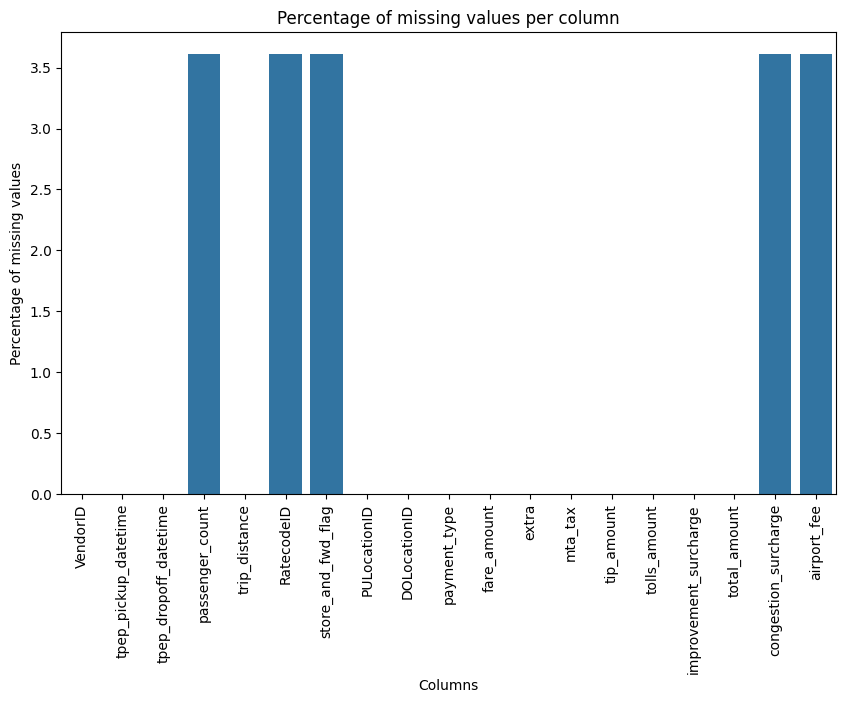

In [7]:
missing_values_percentage = (trips.isnull().sum() / len(trips)) * 100

# Display the percentage of missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_percentage.index, y=missing_values_percentage)
plt.title('Percentage of missing values ​​per column')
plt.xlabel('Columns')
plt.ylabel('Percentage of missing values')
plt.xticks(rotation=90)
plt.show()

In [8]:
trips_with_missing_values = trips[trips.isnull().any(axis=1)]
trips_with_missing_values.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
3458771,2,2022-05-01 00:01:17,2022-05-01 00:18:38,NaN,4.93,NaN,None,166,163,0,23.21,0.0,0.5,2.94,0.0,0.3,29.45,NaN,NaN
3458772,2,2022-05-01 00:40:00,2022-05-01 00:50:00,NaN,1.48,NaN,None,190,97,0,10.00,0.0,0.5,2.38,0.0,0.3,13.18,NaN,NaN
3458773,1,2022-05-01 00:08:38,2022-05-01 00:28:26,NaN,3.90,NaN,None,239,234,0,16.50,0.5,0.5,4.06,0.0,0.3,24.36,NaN,NaN
3458774,2,2022-05-01 00:34:59,2022-05-01 01:12:00,NaN,13.16,NaN,None,61,151,0,43.79,0.0,0.5,10.53,0.0,0.3,57.62,NaN,NaN
3458775,2,2022-05-01 00:12:00,2022-05-01 00:25:00,NaN,4.29,NaN,None,79,262,0,17.65,0.0,0.5,3.00,0.0,0.3,23.95,NaN,NaN


In [9]:
# Validate that empty (NaN) values ​​in multiple columns belong to the same rows
columns_to_validate = ['passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'congestion_surcharge', 'airport_fee']

# Create a new column indicating whether all columns are empty in a specific row
trips_with_missing_values['empty_columns'] = trips_with_missing_values[columns_to_validate].isnull().all(axis=1)

# Check for rows where all columns are empty
trips_with_missing_values = trips_with_missing_values[trips_with_missing_values['empty_columns'] == True]

# Imprimir el numero de filas con valores vacíos en las columnas especificadas
print(trips_with_missing_values.empty_columns.value_counts())

# The number of rows with empty values in the specified columns is 129524, so we can say all 
# rows with missing values in the columns are the same

empty_columns
True    129524
Name: count, dtype: int64


C:\Users\Cesar_Maydana\AppData\Local\Temp\ipykernel_31184\4283347084.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips_with_missing_values['empty_columns'] = trips_with_missing_values[columns_to_validate].isnull().all(axis=1)


In [10]:
# All rows have the same value for the payment_type column, they seems to be canceled trips
# In Documentation, payment method valid values are only from 1 to 6
# So we can assume that the value 0 is a missing value

# Also, 
print(trips_with_missing_values.payment_type.value_counts().sort_index())
trips_with_missing_values.head(5).T

payment_type
0    129524
Name: count, dtype: int64


,3458771,3458772,3458773,3458774,3458775
VendorID,2,2,1,2,2
tpep_pickup_datetime,2022-05-01 00:01:17,2022-05-01 00:40:00,2022-05-01 00:08:38,2022-05-01 00:34:59,2022-05-01 00:12:00
tpep_dropoff_datetime,2022-05-01 00:18:38,2022-05-01 00:50:00,2022-05-01 00:28:26,2022-05-01 01:12:00,2022-05-01 00:25:00
passenger_count,NaN,NaN,NaN,NaN,NaN
trip_distance,4.93,1.48,3.9,13.16,4.29
RatecodeID,NaN,NaN,NaN,NaN,NaN
store_and_fwd_flag,None,None,None,None,None
PULocationID,166,190,239,61,79
DOLocationID,163,97,234,151,262
payment_type,0,0,0,0,0


In [11]:
trips_with_missing_values = trips_with_missing_values.dropna(subset=['passenger_count'])

In [12]:
print(trips_with_missing_values.payment_type.value_counts().sort_index())
trips_with_missing_values.head(5).T

Series([], Name: count, dtype: int64)


""
VendorID
tpep_pickup_datetime
tpep_dropoff_datetime
passenger_count
trip_distance
RatecodeID
store_and_fwd_flag
PULocationID
DOLocationID
payment_type


In [13]:
trips = trips.dropna(subset=['passenger_count'])

In [14]:
# Print the number and percentage of missing values in each column
nan_count = trips.isna().sum()
nan_count = nan_count[nan_count > 0]

print('Quantity of missing values')
print(nan_count)
print('______________')


nan_count = (trips.isna().sum() / len(trips)) * 100
nan_count = nan_count[nan_count > 0]
print(nan_count)

# Finding: the quantity of missing values is the same for all the columns where there is missing data
# but they are the same rows?

Quantity of missing values
Series([], dtype: int64)
______________
Series([], dtype: float64)


In [66]:
# total amount / distancia
# $50 alrededor es por aeropuerto
#plot_hist(trips["fare_amount"], title= 'Fare_Amount', xlabel='Amount', ylabel='value_Counts')

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

plt.rcParams['figure.figsize'] = [10, 6]

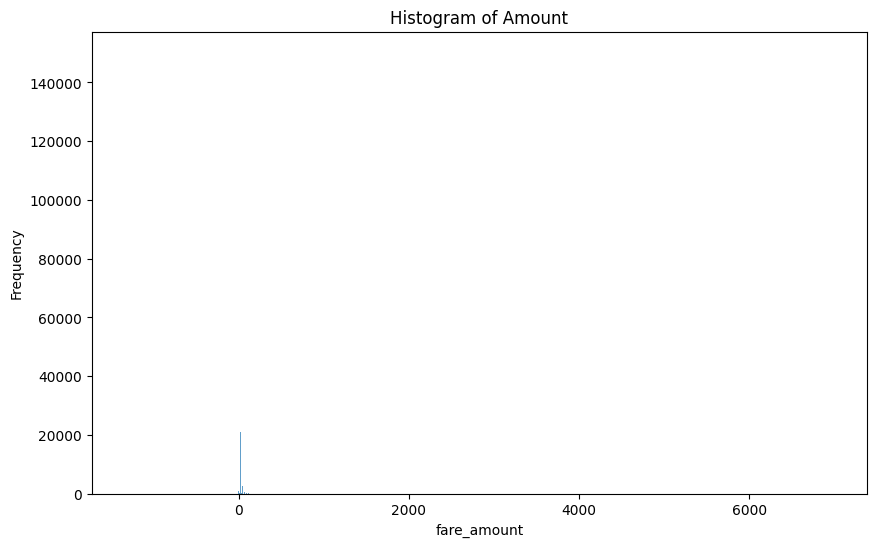

In [17]:
import matplotlib.pyplot as plt

# Asumiendo que 'data' es tu DataFrame y 'amount' es tu columna de interés
plt.hist(trips['fare_amount'], bins='auto', alpha=0.7, rwidth=0.85)

plt.xlabel('fare_amount')
plt.ylabel('Frequency')
plt.title('Histogram of Amount')

plt.show()

In [18]:
mean = trips['fare_amount'].mean()
std = trips['fare_amount'].std()

trips['fare_amount_sigmas'] = (trips['fare_amount'] - mean) / std

In [19]:
trips.count()

VendorID                 3458771
tpep_pickup_datetime     3458771
tpep_dropoff_datetime    3458771
passenger_count          3458771
trip_distance            3458771
RatecodeID               3458771
store_and_fwd_flag       3458771
PULocationID             3458771
DOLocationID             3458771
payment_type             3458771
fare_amount              3458771
extra                    3458771
mta_tax                  3458771
tip_amount               3458771
tolls_amount             3458771
improvement_surcharge    3458771
total_amount             3458771
congestion_surcharge     3458771
airport_fee              3458771
fare_amount_sigmas       3458771
dtype: int64

In [20]:
trips['fare_amount_sigmas'].value_counts()

fare_amount_sigmas
-0.532823    149761
-0.566577    147948
-0.499070    147045
 2.505005    146751
-0.465316    145007
              ...  
-0.718468         1
 4.921766         1
-0.181110         1
 0.439282         1
-5.933407         1
Name: count, Length: 2259, dtype: int64

In [21]:
trips2 = trips[
  (trips['fare_amount_sigmas'] < 3) &
  (trips['fare_amount_sigmas'] > -3)
]

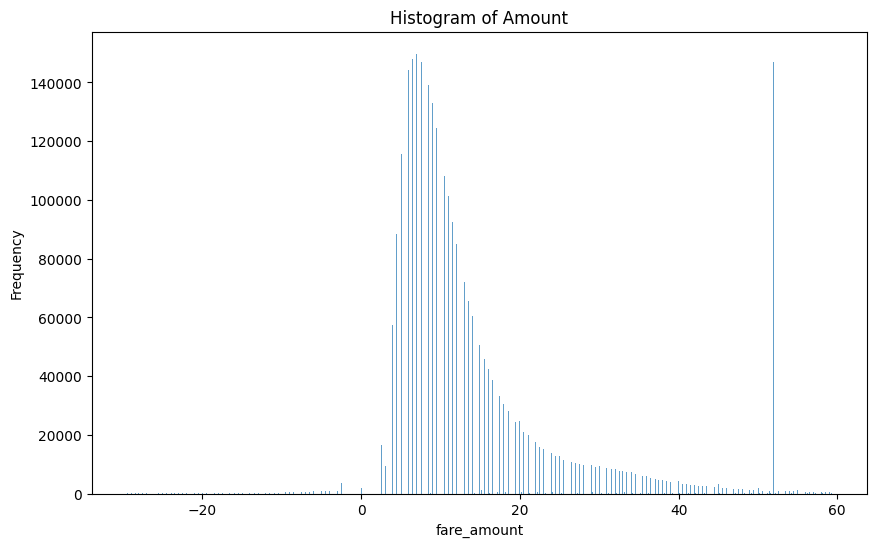

In [24]:
import matplotlib.pyplot as plt

# Asumiendo que 'data' es tu DataFrame y 'amount' es tu columna de interés
plt.hist(trips2['fare_amount'], bins='auto', alpha=0.7, rwidth=0.85)

plt.xlabel('fare_amount')
plt.ylabel('Frequency')
plt.title('Histogram of Amount')

plt.show()

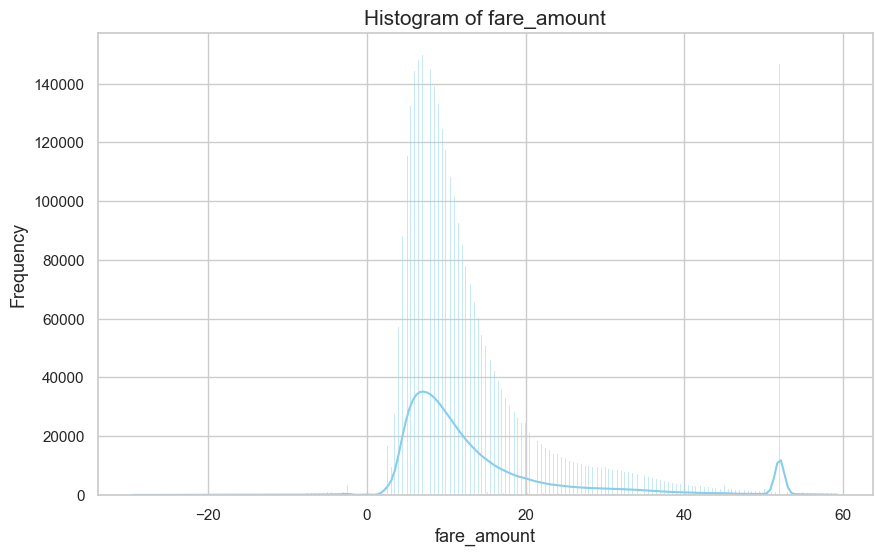

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de Seaborn
sns.set(style="whitegrid")

# Asumiendo que 'trips2' es tu DataFrame y 'fare_amount' es tu columna de interés
plt.figure(figsize=(10,6)) # Ajusta el tamaño de la figura
sns.histplot(trips2['fare_amount'], bins='auto', color='skyblue', kde=True)

plt.xlabel('fare_amount', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Histogram of fare_amount', fontsize=15)

plt.show()

<Axes: xlabel='fare_amount'>

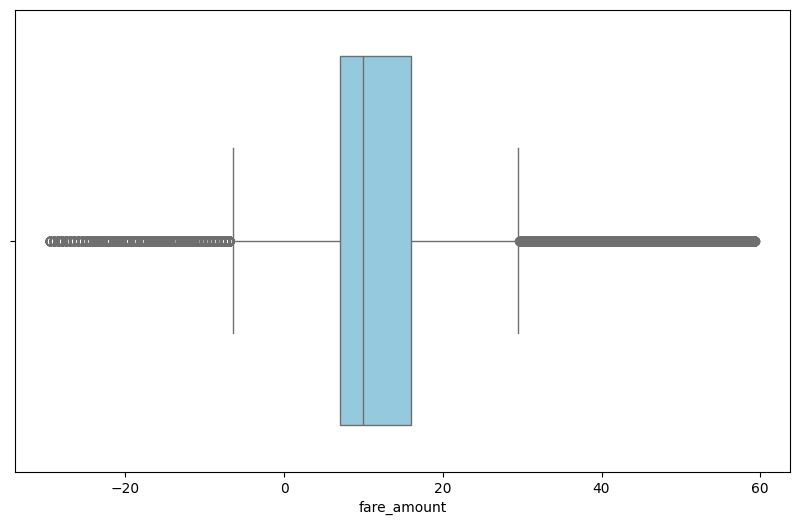

In [22]:
# total amount / distancia
# $50 alrededor es por aeropuerto

sns.boxplot(data=trips2, x='fare_amount', color='skyblue')  # Cambiar el color del gráfico

In [26]:
trips2 = trips2[trips2['fare_amount']>0]

<Axes: xlabel='fare_amount'>

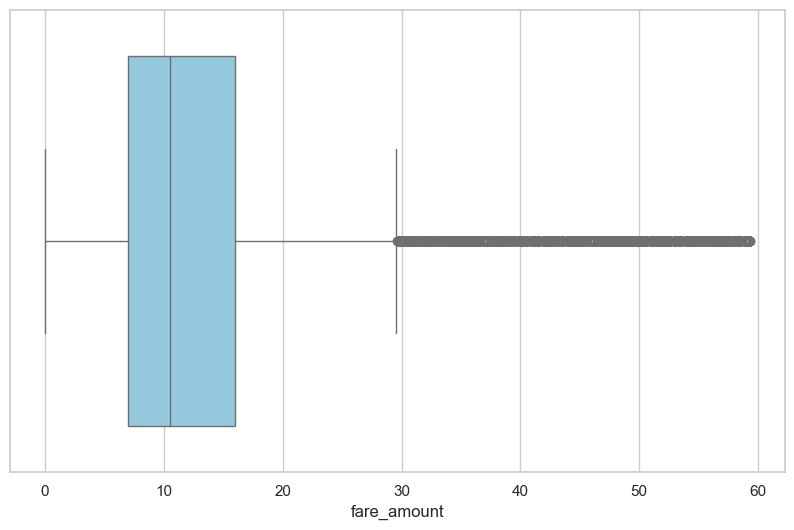

In [27]:
sns.boxplot(data=trips2, x='fare_amount', color='skyblue')  # Cambiar el color del gráfico

In [76]:
trips2.count()

VendorID                 3399862
tpep_pickup_datetime     3399862
tpep_dropoff_datetime    3399862
passenger_count          3399862
trip_distance            3399862
RatecodeID               3399862
store_and_fwd_flag       3399862
PULocationID             3399862
DOLocationID             3399862
payment_type             3399862
fare_amount              3399862
extra                    3399862
mta_tax                  3399862
tip_amount               3399862
tolls_amount             3399862
improvement_surcharge    3399862
total_amount             3399862
congestion_surcharge     3399862
airport_fee              3399862
fare_amount_sigmas       3399862
dtype: int64

In [77]:
trips2["trip_distance"].value_counts()

trip_distance
1.00     48924
1.10     48164
0.90     47922
1.20     47413
1.30     46209
         ...  
39.20        1
32.72        1
44.50        1
29.39        1
29.62        1
Name: count, Length: 3198, dtype: int64

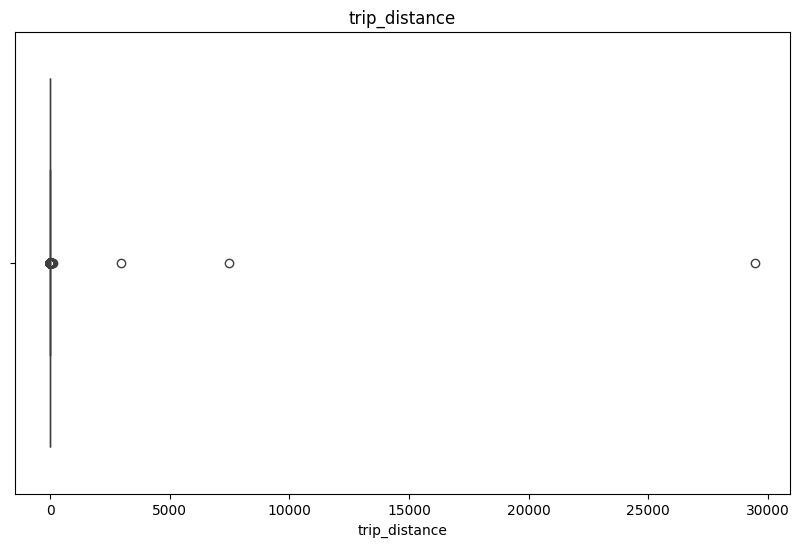

In [78]:
sns.boxplot(data=trips2, x='trip_distance').set_title('trip_distance')
plt.show()

0.0
14.4


<Axes: xlabel='trip_distance'>

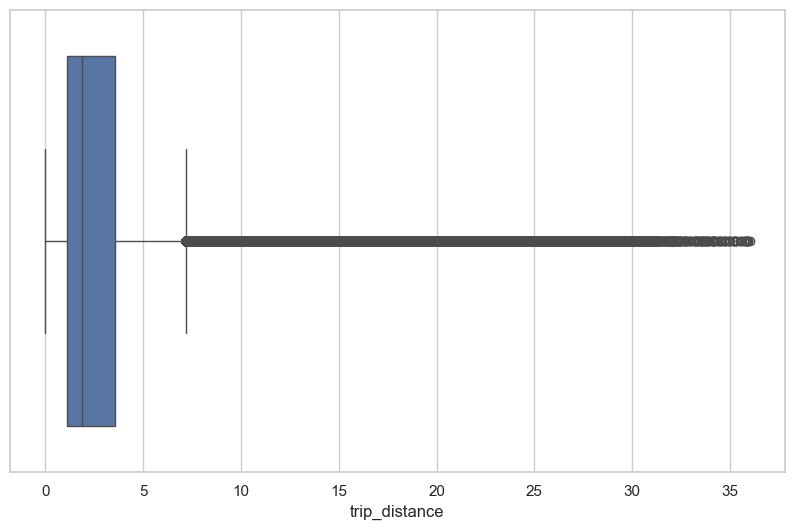

In [28]:
# Calcular el IQR
Q1 = np.percentile(trips2['trip_distance'], 0)
print(Q1)
Q3 = np.percentile(trips2['trip_distance'], 95)
print(Q3)
IQR = Q3 - Q1

# Definir un factor mayor para incluir más datos
factor = 1.5

# Filtrar los valores dentro del rango ampliado
filtered_trips = trips2[(trips2['trip_distance'] >= Q1 - factor * IQR) & (trips2['trip_distance'] <= Q3 + factor * IQR)]

# Crear el boxplot con los datos filtrados
sns.boxplot(x=filtered_trips['trip_distance'])

In [80]:
filtered_trips.shape

(3399773, 20)

In [81]:
filtered_trips.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
fare_amount_sigmas       0
dtype: int64

In [82]:
# buscamos concentracion de datos, debido a que los graficos anteriores no arrojan informacion suficiente.

In [83]:
#filtered_trips.plot.scatter('trip_distance', 'total_amount')

In [84]:
#filtered_trips["RatecodeID"].value_counts()

In [85]:
#filtered_trips=filtered_trips["RatecodeID"] <= 6

In [86]:
#filtered_trips["RatecodeID"].value_counts()

In [87]:
#filtered_trips=filtered_trips[pickup_year]==2022

In [88]:
filtered_trips

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,fare_amount_sigmas
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.10,1.0,N,246,151,2,17.0,3.0,0.5,0.00,0.0,0.3,20.80,2.5,0.0,0.142250
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.30,1.0,N,238,74,2,11.0,3.0,0.5,0.00,0.0,0.3,14.80,2.5,0.0,-0.262794
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.20,1.0,N,163,260,2,15.5,3.0,0.5,0.00,0.0,0.3,19.30,2.5,0.0,0.040989
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.00,1.0,N,79,182,1,41.2,0.0,0.5,0.00,0.0,0.3,42.00,0.0,0.0,1.775926
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.60,1.0,N,238,75,1,7.5,3.0,0.5,2.25,0.0,0.3,13.55,2.5,0.0,-0.499070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458766,2,2022-05-31 23:32:53,2022-05-31 23:38:24,1.0,1.33,1.0,N,161,236,1,7.0,0.5,0.5,2.16,0.0,0.3,12.96,2.5,0.0,-0.532823
3458767,2,2022-05-31 23:50:58,2022-05-31 23:57:27,1.0,1.89,1.0,N,142,238,1,8.0,0.5,0.5,3.54,0.0,0.3,15.34,2.5,0.0,-0.465316
3458768,2,2022-05-31 23:43:33,2022-05-31 23:57:09,1.0,3.43,1.0,N,186,43,1,12.5,0.5,0.5,1.00,0.0,0.3,17.30,2.5,0.0,-0.161533
3458769,2,2022-05-31 23:01:31,2022-05-31 23:04:42,2.0,0.95,1.0,N,239,238,1,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5,0.0,-0.667838


In [89]:
filtered_trips['passenger_count'].

<bound method IndexOpsMixin.value_counts of 0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
3458766    1.0
3458767    1.0
3458768    1.0
3458769    2.0
3458770    1.0
Name: passenger_count, Length: 3399773, dtype: float64>

In [90]:
trips.passenger_count.value_counts()

passenger_count
1.0    2549880
2.0     539027
3.0     136997
0.0      73587
5.0      61209
4.0      56092
6.0      41948
7.0         15
8.0         14
9.0          2
Name: count, dtype: int64